In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence


N_words = 10000
N_tokens = 500
N_batch = 128

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=N_words)

input_train = sequence.pad_sequences(input_train, maxlen=N_tokens)
input_test = sequence.pad_sequences(input_test, maxlen=N_tokens)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN


model = Sequential()
model.add(Embedding(N_words, 32, input_length=N_tokens))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 13s 77ms/step - loss: 0.5733 - acc: 0.7006 - val_loss: 0.4771 - val_acc: 0.7856
Epoch 2/10
157/157 [==============================] - 14s 88ms/step - loss: 0.3787 - acc: 0.8422 - val_loss: 0.4180 - val_acc: 0.8176
Epoch 3/10
157

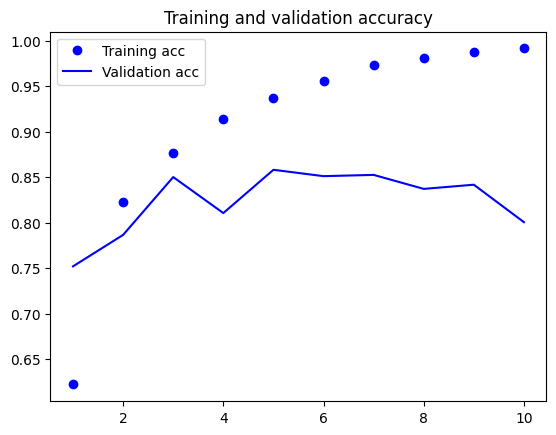

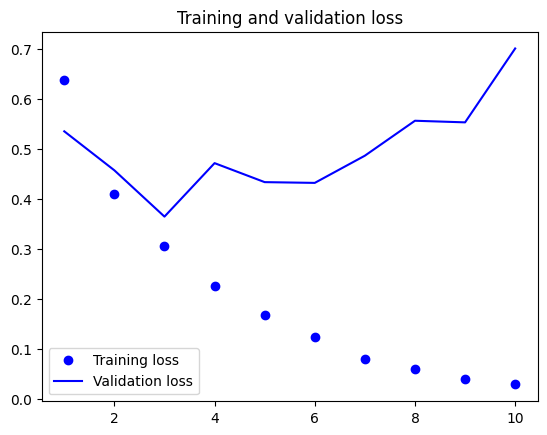

In [6]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()